# Titanic Survival Prediction Project
This project predicts the survival of Titanic passengers based on demographic characteristics. The goal is to build a machine learning model that accurately predicts survival rates.

## Methodology
1. Data preprocessing
2. Exploratory data analysis (EDA)
3. Feature engineering
4. Model selection and hyperparameter tuning
5. Model evaluation

## Results
The final model achieved an accuracy of 83% on the testing set, indicating that it can accurately predict the survival of passengers based on their characteristics.

## Code Organization
The code is organized into sections for data loading and preprocessing, EDA, feature engineering, model selection and hyperparameter tuning, model evaluation, and model export.

## Note
This project demonstrates the application of machine learning techniques to predict the survival of passengers on the Titanic. The results should not be taken as a definitive prediction of survival, but rather as a demonstration of the power of machine learning in predicting outcomes based on available data.

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
# Load and Explore Data
# Load the training data from a CSV file
df=pd.read_csv('train.csv')

In [3]:
# Display the first few rows of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display summary statistics for the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Display information about the data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for missing values in the data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Handle Missing Values
# Impute missing values in the Embarked column with the most frequent value and Age column with the mean value
emb_mode=df['Embarked'].mode().values[0]
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(emb_mode)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
# Feature Selection
df=df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [10]:
# Optimize Data Types
# Convert data types to reduce memory usage
df['Survived']=df['Survived'].astype(np.int16)
df['Pclass']=df['Pclass'].astype(np.int16)
df['SibSp']=df['SibSp'].astype(np.int16)
df['Parch']=df['Parch'].astype(np.int16)
df['Fare']=df['Fare'].astype(np.float32)
df['Age']=df['Age'].astype(np.float32)
df['Embarked']=df['Embarked'].astype('category')
df['Sex']=df['Sex'].astype('category')

In [11]:
# Display information about the data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int16   
 1   Pclass    891 non-null    int16   
 2   Sex       891 non-null    category
 3   Age       891 non-null    float32 
 4   SibSp     891 non-null    int16   
 5   Parch     891 non-null    int16   
 6   Fare      891 non-null    float32 
 7   Embarked  891 non-null    category
dtypes: category(2), float32(2), int16(4)
memory usage: 16.0 KB


### EDA

<Axes: xlabel='Embarked'>

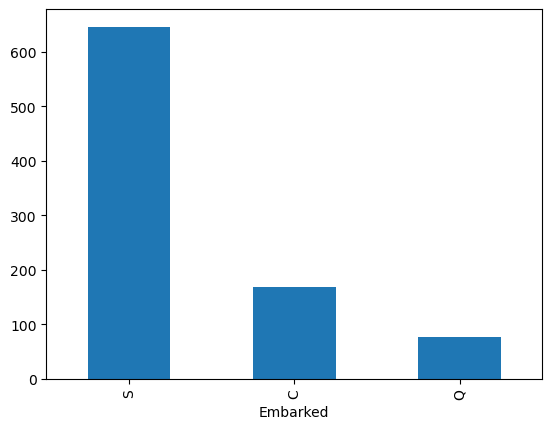

In [12]:
# Visualize Data

df['Embarked'].value_counts().plot(kind='bar')

D:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


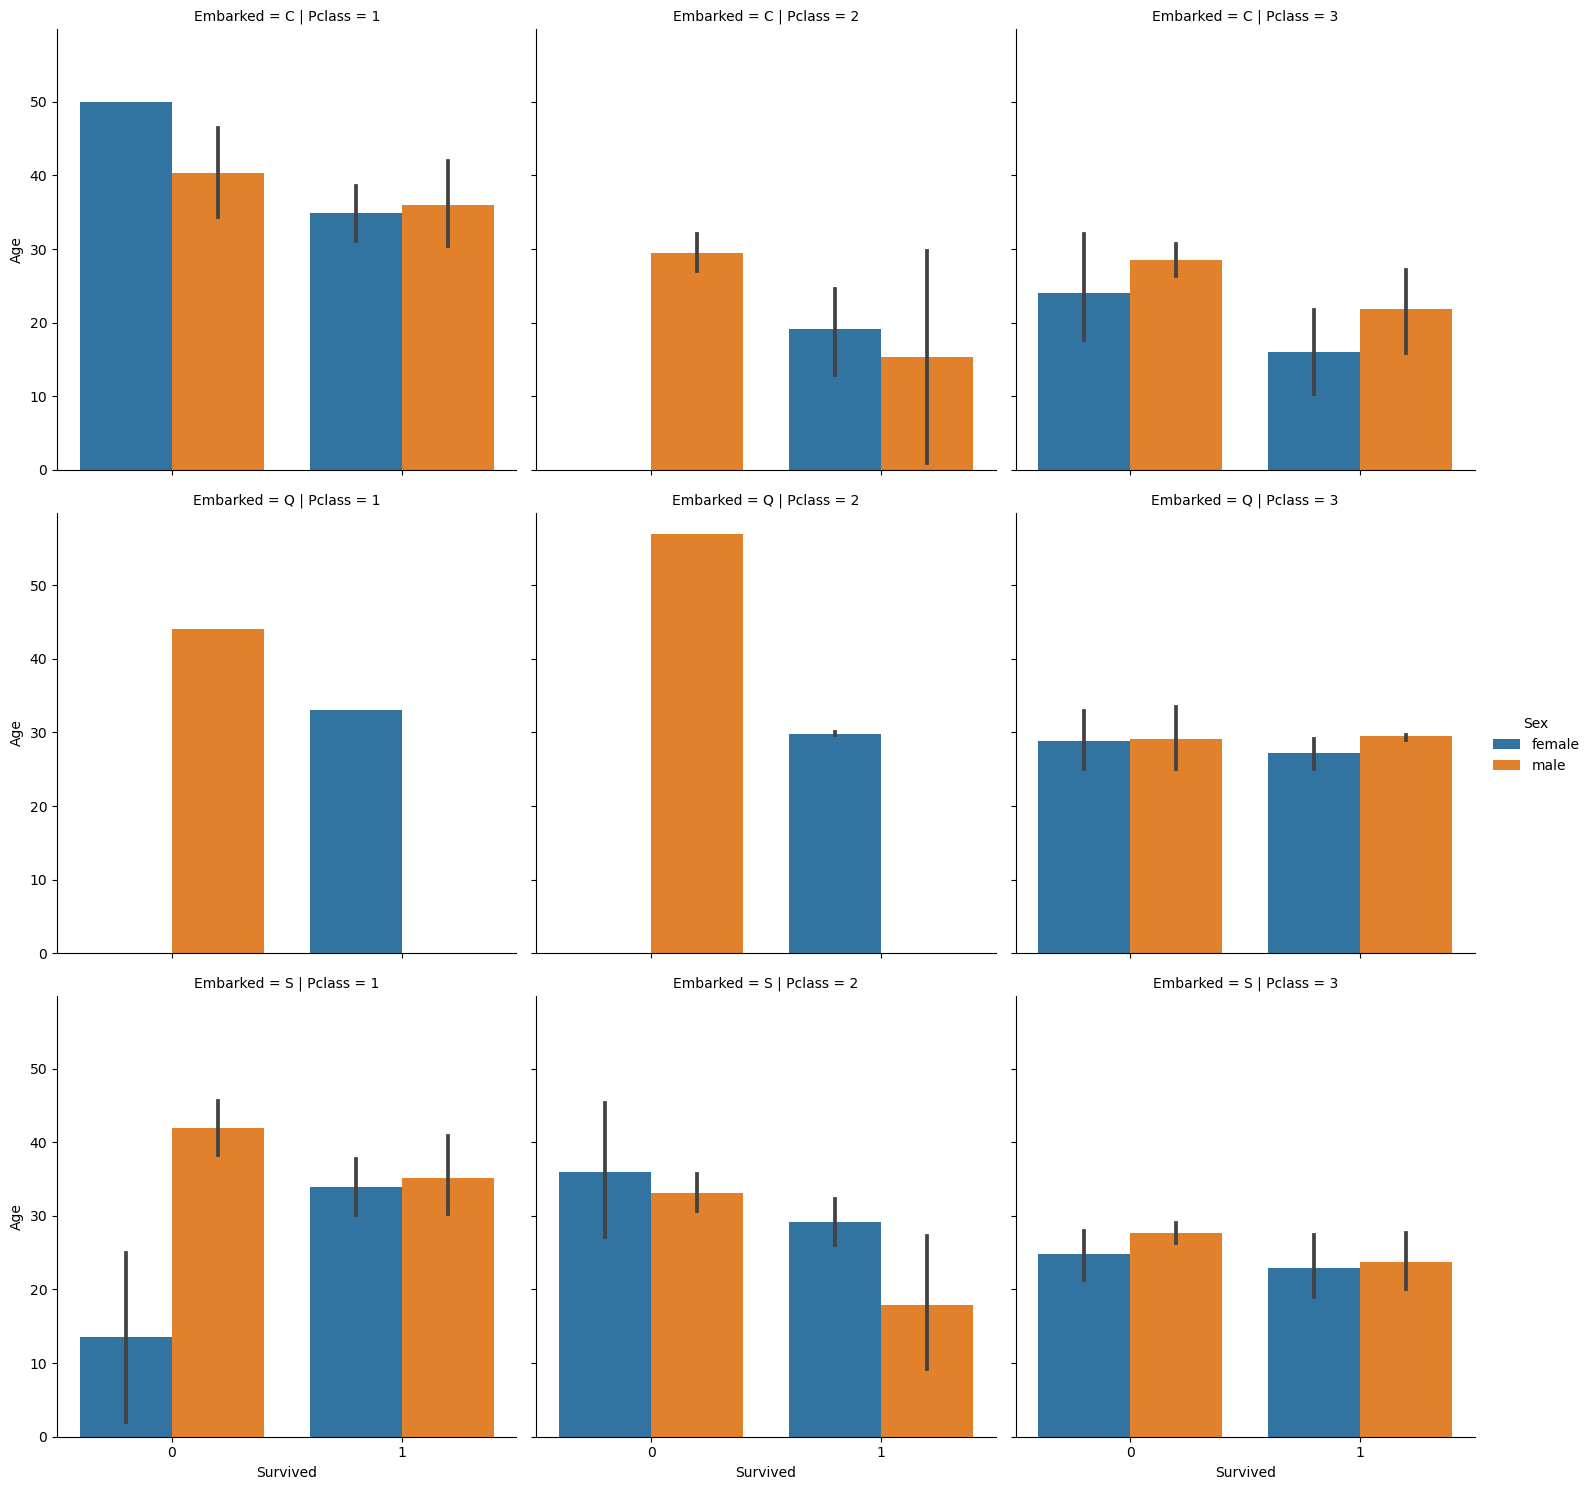

In [13]:
# Plot the distribution of Age by Survived and Sex
sns.catplot(x='Survived',y='Age',data=df,kind='bar',hue='Sex',col='Pclass',row='Embarked')
plt.show()

C:\Users\Abdurehman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


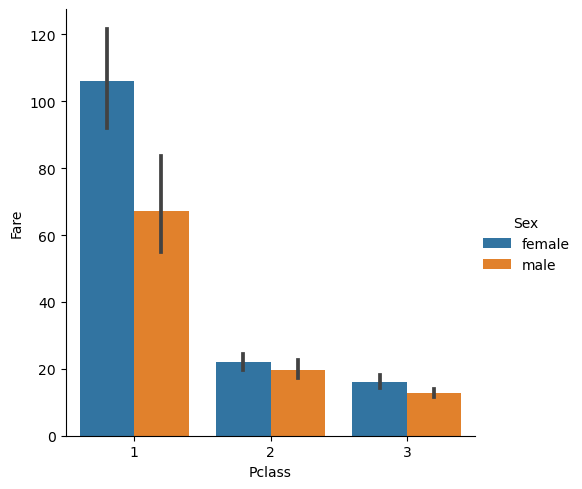

In [14]:
# Plot the distribution of Fare by Pclass and Sex
sns.catplot(x='Pclass',y='Fare',hue='Sex',data=df,kind='bar')
plt.show()

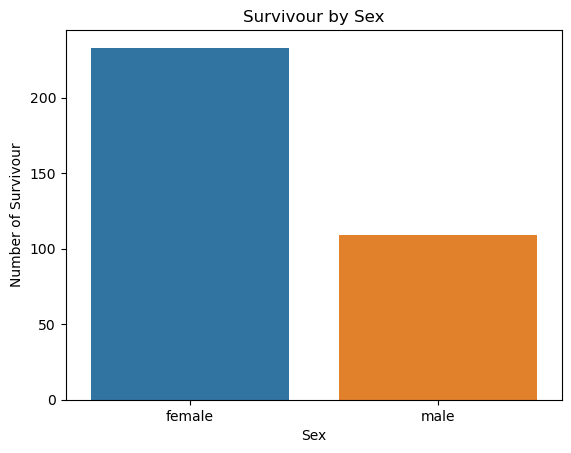

In [15]:
# Plot the number of survivors by Sex
survivour=df[df['Survived']==1]['Sex'].value_counts()
sns.barplot(x=survivour.index,y=survivour.values)
plt.xlabel('Sex')
plt.ylabel('Number of Survivour')
plt.title('Survivour by Sex')
plt.show()
# In graph we can see around 240 female was survived

Text(0.5, 1.0, 'Non-survivour by Sex')

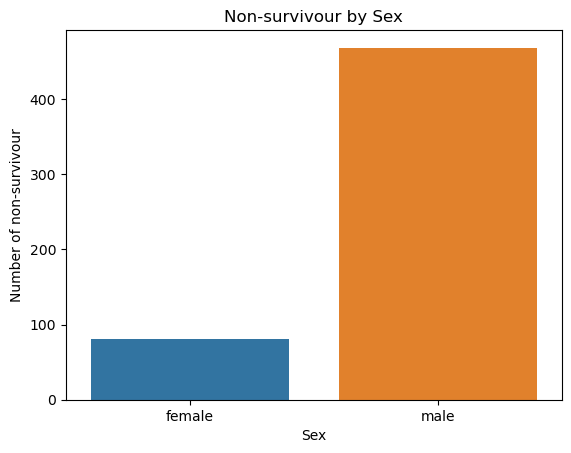

In [16]:
# Plot the number of non-survivors by Sex
non_survivour=df[df['Survived']==0]['Sex'].value_counts()
sns.barplot(x=non_survivour.index,y=non_survivour.values)
plt.xlabel('Sex')
plt.ylabel('Number of non-survivour')
plt.title('Non-survivour by Sex')

# In graph we can clearly see around 470 males can't survived. this shows that in titanic accident women's were gives
# more priorty to saved them 

<Axes: xlabel='Pclass', ylabel='Survived'>

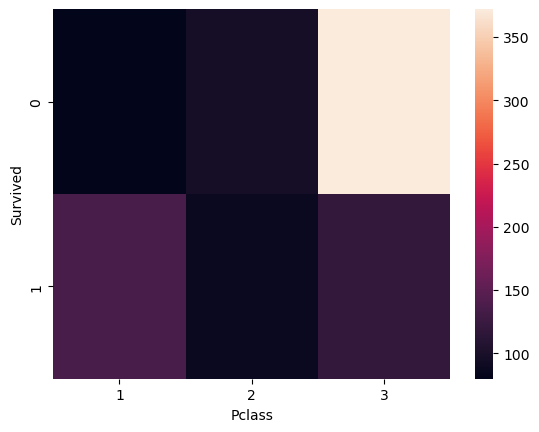

In [17]:
# Plot the heatmap of Survived vs Pclass
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass']))

C:\Users\Abdurehman\AppData\Local\Temp\ipykernel_3244\3884048110.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived']==0]['Age'],label='Death',shade=True)
C:\Users\Abdurehman\AppData\Local\Temp\ipykernel_3244\3884048110.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived']==1]['Age'],label='Survived',shade=True)


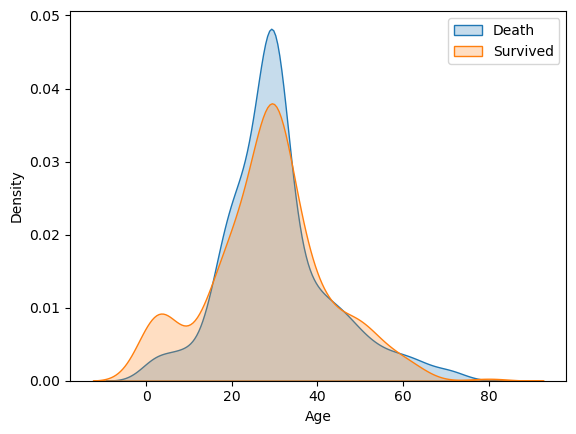

In [18]:
# Plot the kernel density estimate of Age by Survived
sns.kdeplot(df[df['Survived']==0]['Age'],label='Death',shade=True)
sns.kdeplot(df[df['Survived']==1]['Age'],label='Survived',shade=True)
plt.legend()
plt.show()
# As we can see in the graph the survival rate up to 10 years children has more. As age increase survival rate decreases

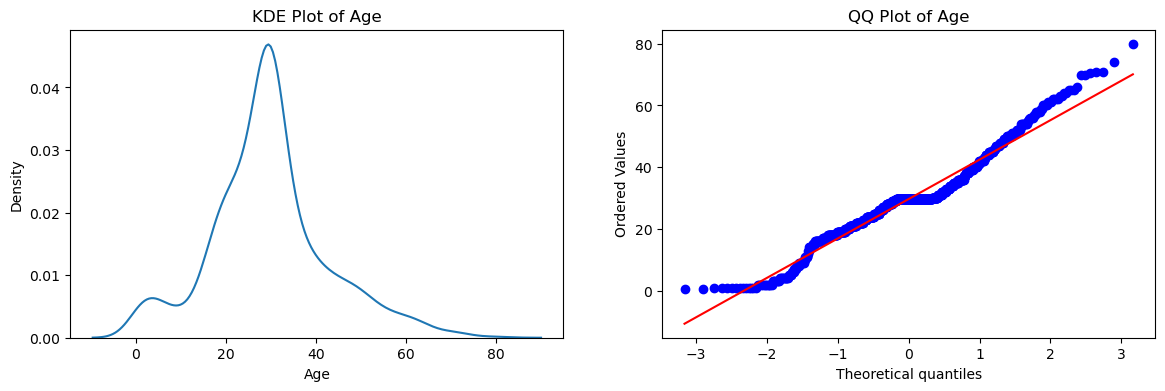

In [19]:
## Check for Normality
# Plot the kernel density estimate and Q-Q plot of Age
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['Age'])
plt.title('KDE Plot of Age')
plt.subplot(122)
stat.probplot(df['Age'],dist='norm',plot=plt,fit=True)
plt.title('QQ Plot of Age')
plt.show()

# In graph we can see Age column data is almost normally distributed

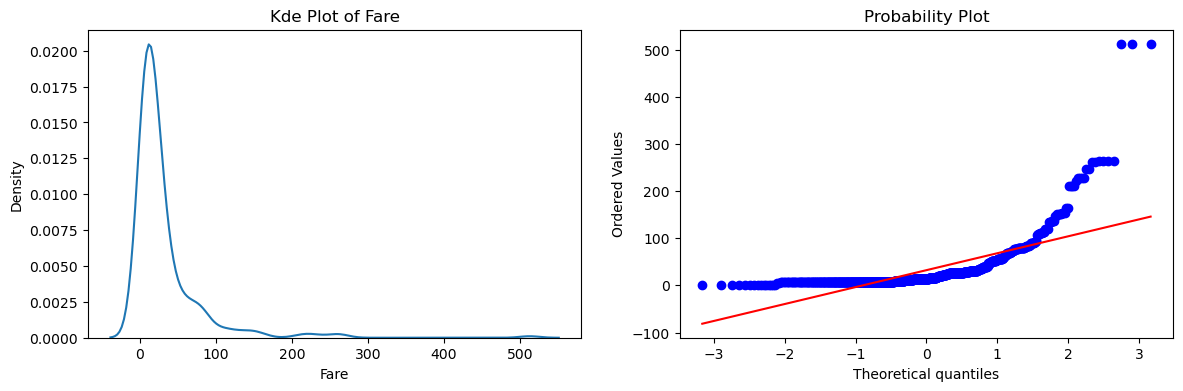

In [20]:
# Plot the kernel density estimate and Q-Q plot of Fare
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['Fare'])
plt.title('Kde Plot of Fare')
plt.subplot(122)
stat.probplot(df['Fare'],dist='norm',plot=plt,fit=True)
plt.show('QQ Plot of Fare')
plt.show()

# in graph we can crealy see Fare column data is right skewed so it need to be normalize.

In [21]:
## Correlation Analysis
# Calculate the correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


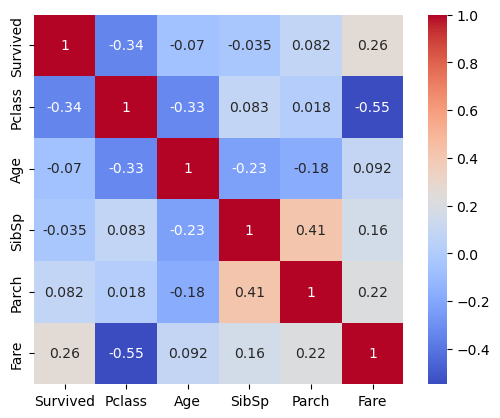

In [22]:
# Visualize the correlation matrix
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', square=True)
plt.show()


C:\Users\Abdurehman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


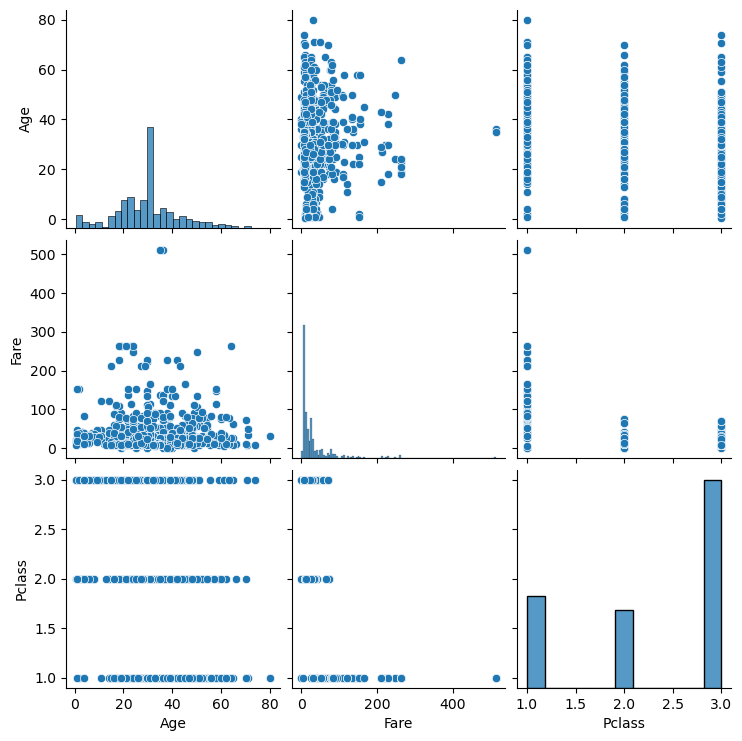

In [23]:
# Plot the pairplot of Age, Fare, and Pclass
sns.pairplot(df, vars=['Age', 'Fare', 'Pclass'])
plt.show()

C:\Users\Abdurehman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


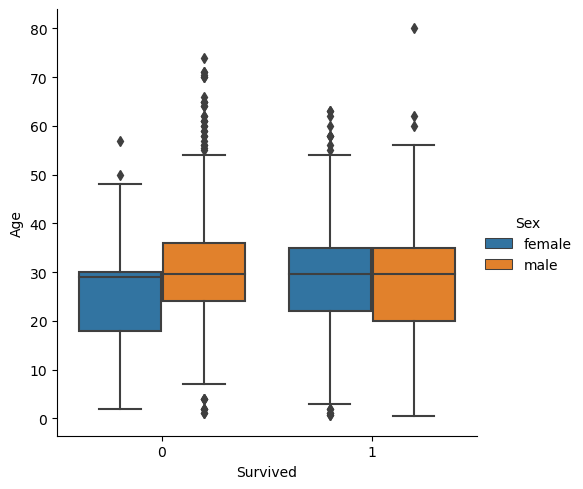

In [24]:
# Plot the boxplot of Age by Survived and Sex
sns.catplot(x='Survived',y='Age',data=df,kind='box',hue='Sex')
plt.show()

## Feature Construction

In [14]:
# Create a new column 'Family_Size' by summing 'Parch' and 'SibSp' and adding 1(Person itself)
df['Family_Size']=df['Parch'] + df['SibSp'] +1

In [15]:
# Define a function to categorize family size into three types
def family_size(num):
    # Alone
    if num==1:
        return 1
    # Small Family
    elif (num>1) and (num<=4):
        return 2
    # Large Family
    else:
        return 3

In [16]:
# Apply the family_size function to the 'Family_Size' column to create a new column 'Family_type'
df['Family_type']=df['Family_Size'].apply(family_size)

In [17]:
# Drop the original columns 'SibSp', 'Parch', and 'Family_Size' as they are no longer needed
df=df.drop(columns=['SibSp','Parch','Family_Size'])

In [18]:
# Preview the first few rows after transformation
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_type
0,0,3,male,22.0,7.250000,S,2
1,1,1,female,38.0,71.283302,C,2
2,1,3,female,26.0,7.925000,S,1
3,1,1,female,35.0,53.099998,S,2
4,0,3,male,35.0,8.050000,S,1


## Encoding Categorical Columns

In [19]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

# Model Preparing

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import PowerTransformer

In [21]:
# Normalize the Fare column
pt = PowerTransformer(method='yeo-johnson')
df['Fare']=pt.fit_transform(df['Fare'].values.reshape(-1,1))

D:\Anaconda\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [22]:
# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=42)

In [23]:
x_train.sample(5)

,Pclass,Sex,Age,Fare,Embarked,Family_type
347,3,1,29.699118,-0.081796,0,2
1,1,1,38.000000,1.336641,1,2
455,3,0,29.000000,-0.793745,1,1
535,2,1,7.000000,0.398769,0,2
500,3,0,17.000000,-0.701143,0,1


In [24]:
# Initialize the Random Forest Classifier
rf=RandomForestClassifier(n_estimators=50,min_samples_split=15,max_depth=10,random_state=42)

In [25]:
# Model Training
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=15, n_estimators=50,
                       random_state=42)

In [26]:
# Make predictions on the test set using the best model
y_pred=rf.predict(x_test)

In [27]:
# Evaluate the model using accuracy score
accuracy_score(y_test,y_pred)

0.8324022346368715

In [28]:
# Evaluate the model using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [29]:
# Perform cross-validation to evaluate the model's performance
cross_val_score(rf,x_train,y_train,cv=10,scoring='accuracy').mean()

0.8314553990610328

In [30]:
# Evaluate the model using confusion matrix
confusion_matrix(y_test,y_pred)

array([[94, 11],
       [19, 55]], dtype=int64)

## Export the Model

In [31]:
import pickle

In [33]:
# Save the grid object to a pickle file
pickle.dump(rf,open('titanic_model.pkl','wb'))

## Prediction on new data

In [34]:
new_data=pd.DataFrame({'Pclass':[2],'Sex':[1],'Age':[31],'Fare':[37],'Embarked':[0],'Family_type':[2]})

In [35]:
rf.predict(new_data)

array([1], dtype=int16)